In [5]:
# !pip install statsmodels
# !pip install seaborn

In [6]:
%cd /notebooks/anomaly-detector

/notebooks/anomaly-detector


In [7]:
try:
    from src.data import preprocessing  
    
except ModuleNotFoundError:
    print("installing requirements..")
    os.system('pip install -r requirements.txt')
    from src.data import preprocessing
    
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

In [8]:
df_path = '/notebooks/anomaly-detector/data/raw/V_GV_SYSMETRIC_INCTANCE_2.csv'

In [10]:
df = preprocessing.get_df(df_path, columns_name=None)

dataframe shape: (78503, 155)


In [12]:
register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

In [ ]:
stl = STL(df['Database Time Per Sec'][0:60*24*7].values, period=60*24)
res = stl.fit()

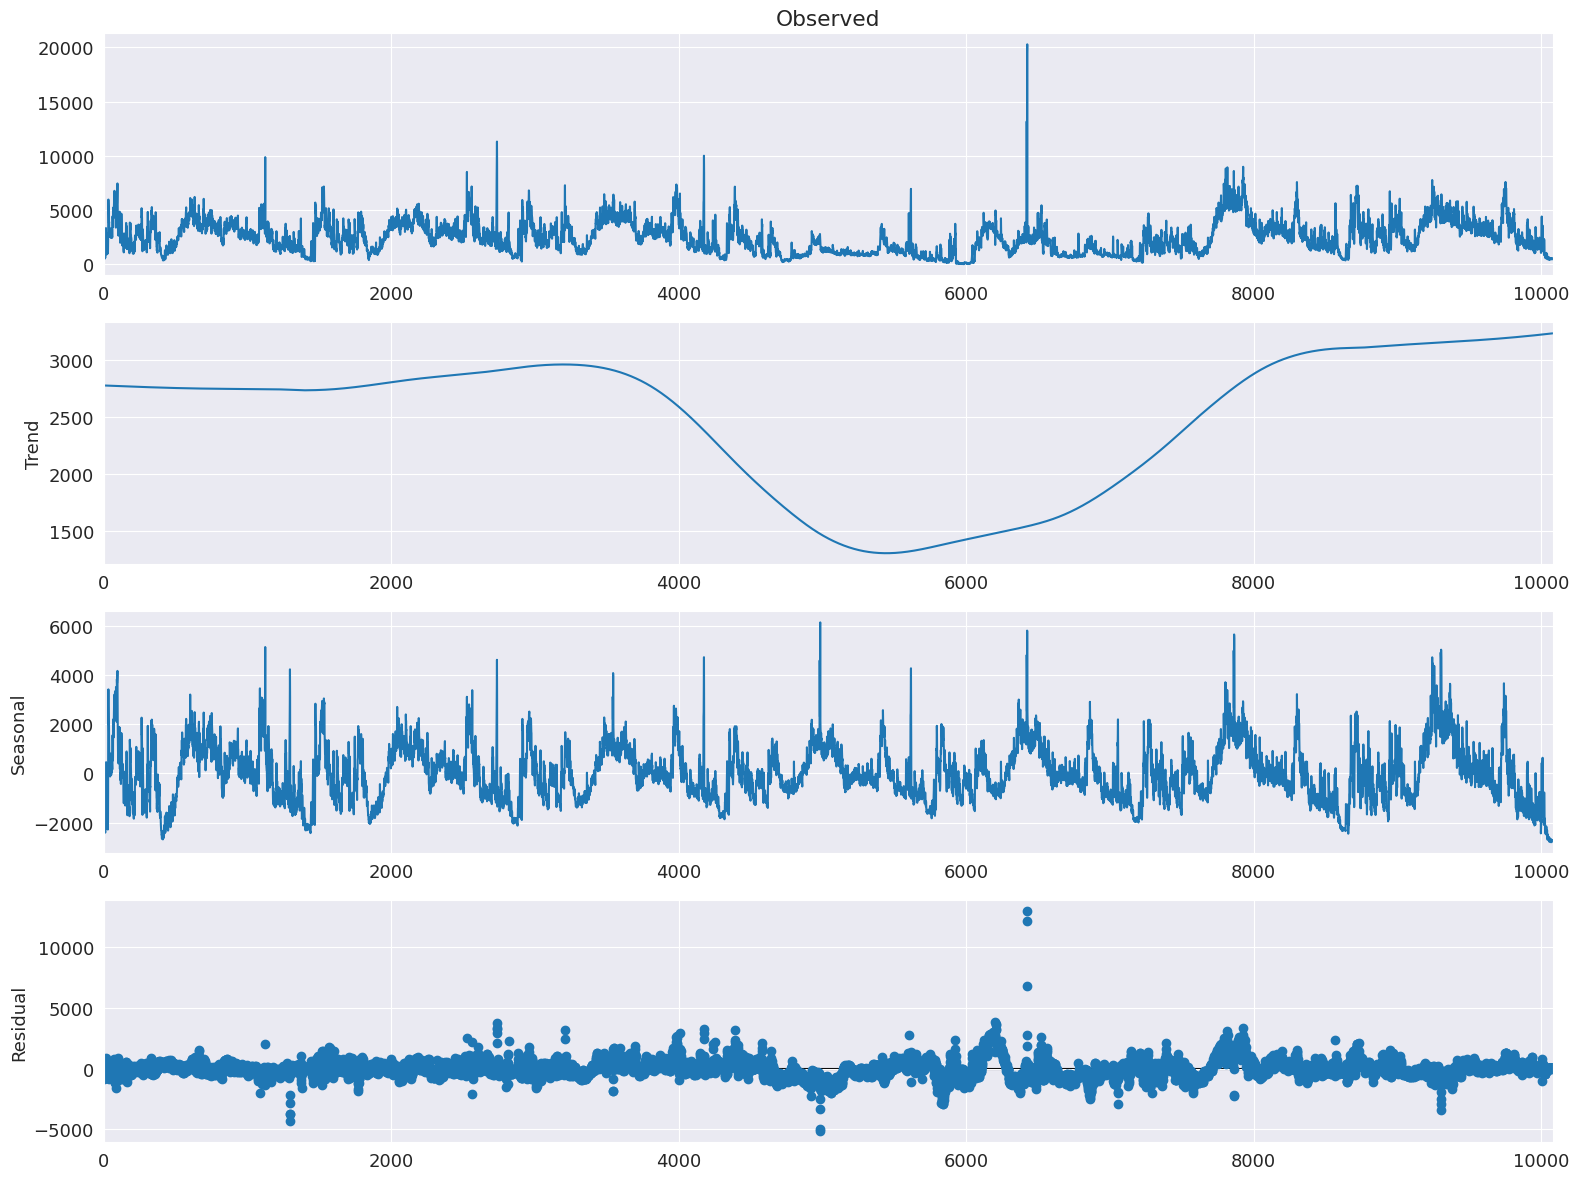

In [38]:
fig = res.plot()
fig.savefig('reports/timeseries/decomposition.svg')

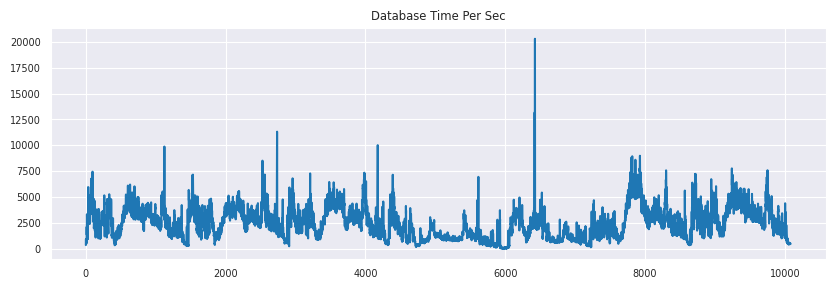

In [80]:
register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(10, 3))
plt.rc("font", size=7)

plt.plot(df['Database Time Per Sec'][0:60*24*7].values)
plt.title('Database Time Per Sec')
plt.savefig('reports/timeseries/univariate_ts.svg')

In [82]:
import numpy as np

plt.rc("figure", figsize=(10, 6))
plt.rc("font", size=7)

NameData = ['Physical Reads Per Sec', 'Executions Per Sec','Database Time Per Sec']
dates_list = [np.linspace(0, 60*24*7-1, 60*24*7), np.linspace(0, 60*24*7-1, 60*24*7), np.linspace(0, 60*24*7-1, 60*24*7)]
df = df[0:60*24*7]
value_list = [df['Physical Reads Per Sec'].values, df['Executions Per Sec'].values, df['Database Time Per Sec'].values]

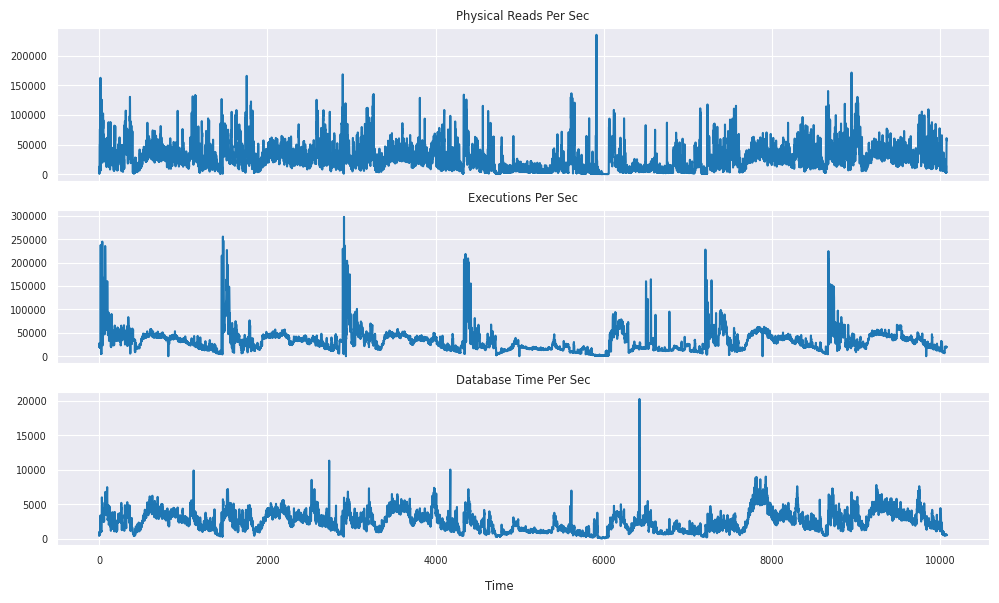

In [83]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
fig.supxlabel('Time')
for i, (title, y, x) in enumerate(zip(NameData,value_list,dates_list)):
    ax[i].plot(x,y)
    ax[i].set_title(title)
    # ax[i].set_ylabel(unit)
plt.tight_layout()
plt.savefig('reports/timeseries/multivariate_ts.svg')